<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/RLM_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Previsão do Custo de Plano de Saúde por Pessoa**
#**Medical Cost Data**



#Importação dos Dados

In [144]:
import pandas as pd

In [87]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [6]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dados.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [88]:
dados.shape

(1338, 7)

In [89]:
#Instalando biblioteca de visualização
!pip install sweetviz

In [90]:
#Importando biblioteca

import sweetviz

In [91]:
#Criando um arquivo html com Análise de Dados

eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#**Pré Processamento dos Dados**


*   Variável smoker (fumente): 0 (não) e 1 (sim)
*   Variável resposta na escala para cada mil dólares



In [92]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

#**Variáveis Consideradas no Modelo**


*   BMI: Índice de Massa Corporal
*   Smoker: fumante ou não
*   Charges: custos




In [93]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head().round(2)

,bmi,smoker,charges
0,27.90,1,16.88
1,33.77,0,1.73
2,33.00,0,4.45
3,22.70,0,21.98
4,28.88,0,3.87


#**Gráficos Pertinentes**

##**Dispersão Entre Fumantes e BMI**

In [94]:
import seaborn as sns

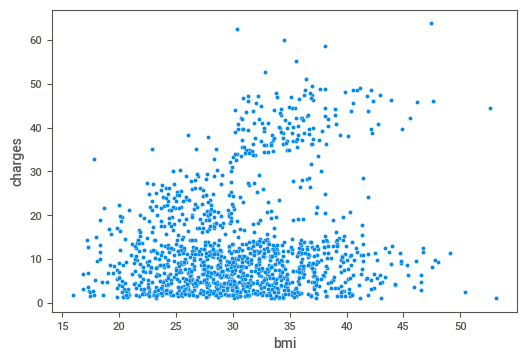

In [95]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

#A dispersão não sugere relação linear entre as variáveis

#**Categorizando Fumantes na Dispersão**

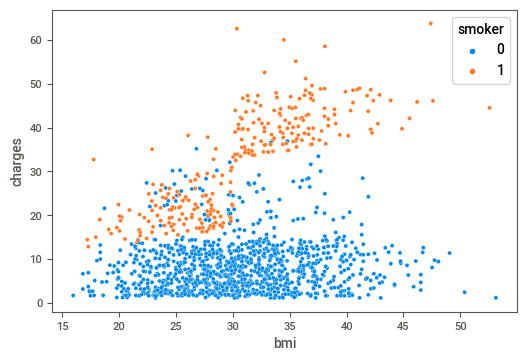

In [96]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);


#**Separando a Variável Dependente da Independente**

In [97]:
x = dados[['bmi', 'smoker']]
y = dados['charges']

#**Método de Validação: Holdout**

*   25% dos dados para teste
*   75% dos dados para treinamento



In [98]:
import pandas as pd

In [99]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)

In [100]:
Xteste.shape
Xtreino.shape

print(Xtreino.shape)
print(Xteste.shape)

(1003, 2)
(335, 2)


In [101]:
Xtreino.head()

,bmi,smoker
98,19.950,1
762,27.100,1
1230,34.485,1
1220,21.945,0
1056,28.900,0


#**Ajustando o Modelo de Regressão Linear**

In [125]:
!pip install sklearn

In [126]:
import sklearn

In [127]:
from sklearn.linear_model import LinearRegression

#Ajuste na Amostra Treino

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

#Predição da Amostra Teste

preditos = reg.predict(Xteste)

#**Predição da Amostra Teste**

In [128]:
preditos = reg.predict(Xteste)
preditos

array([30.91383355,  5.58617779,  5.73131626, 29.87303789, 10.90282939,
        8.30752424,  8.16047605,  8.49658621,  8.49658621,  6.5868694 ,
        3.7356622 ,  4.60076391, 29.79664922,  7.99242097,  8.34380886,
       29.60567754, 11.26949501,  9.63095799,  5.40475469,  9.43234744,
        6.34815479,  9.46290291, 10.97539862,  8.95873767,  8.45457244,
        4.8604854 ,  9.88304061,  5.58617779, 30.18814117, 33.0546261 ,
        7.14641642,  7.90839343, 29.24474106,  6.22784264,  8.26742019,
       10.47123339,  9.71498553,  7.65631081, 12.57192188,  6.96881276,
        7.32020065,  3.15510829,  8.00005983,  7.79953957,  7.08339577,
        7.9504072 ,  8.05353191, 13.49622481,  4.40979223,  8.88807815,
        7.18270104, 31.02268741, 11.66671611,  5.51742798,  7.2915549 ,
       14.04240382,  4.35250073,  9.29866727,  6.78357023,  7.40040876,
       29.53692773, 31.34351984, 11.24657841, 28.99074873,  7.90839343,
        8.4163781 ,  8.62262751, 10.15803983, 10.177137  , 32.20

In [129]:
import numpy as np

np.mean((preditos - yteste)**2)

51.166893326206335

#**Métrica de Avaliação: Erro Quadrático Médio (MSE)**

In [130]:
from sklearn.metrics import mean_squared_error

eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 4)))

EQM: 51.1669


###**Coeficientes**

In [131]:
b0 = reg.intercept_
b1, b2 = reg.coef_

print('Intercepto: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -3.267269342318272
Coeficientes: 
 [ 0.38194336 23.47714018]


#**O Modelo de Regressão**

##**Nesse cenário, o modelo de regressão linear é dado por:**


*   Custos = b0 + b1.BMI + b2.0 - **Se não fumante**
*   Custos = b0 + b1.BMI + b2.1 - **Se fumante**

In [132]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1


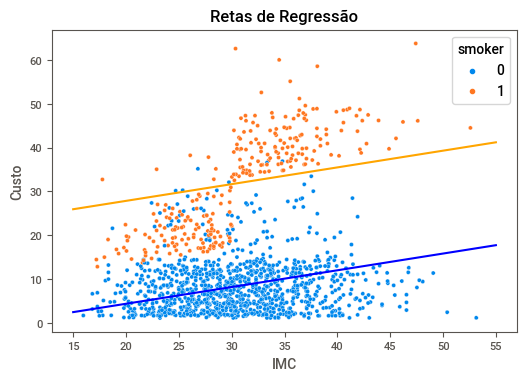

In [133]:
import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

#**Holdout Repetido**

##Repetições da técnica Holdout variando a distribuição de quem vai pra amostra de teste e treinamento.

##**Objetivo:** Obter um valor mais estável para o EQM

In [135]:
def HoldoutRep(modelo = LinearRegression(), rep = 1000, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms_treino = []
  eqms_teste = []

  for i in range(replicas):
    Xtreino , Xteste, ytreino, yteste  = train_test_split(x, y, test_size = proporcao)
        
    #Treinando o Modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)

    #Verificando o eqm no teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(yteste, preditos_teste)

    #Guardando o resultado
    eqms_treino.append(eqm_treino)
    eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste

In [79]:
def HoldoutRep(modelo = LinearRegression(), replica = 100, proporcao = 0.25):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split

  eqms_treino = []
  eqms_teste = []

  for i in range(replica):
    Xtreino, Xteste, ytreino, yteste = train_test_split(x, y, test_size = proporcao)

    #Treino do Modelo
    reg = modelo
    reg.fit(Xtreino, ytreino)

    #Verificando o EQM no teste
    preditos_treino = reg.predict(Xtreino)
    eqm_treino = mean_squared_error(ytreino, preditos_treino)

    preditos_teste = reg.predict(Xteste)
    eqm_teste = mean_squared_error(xteste, preditos_teste)

    #Armazenando o Resultado
    eqms_treino.append(eqm_treino)
    eqms_teste.append(eqm_teste)

    resultado_treino = np.array(eqms_treino).mean().round(2)
    resultado_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de Treino: {}'.format(resultado_treino))
    print('EQM médio de Teste: {}'.format(resultado_teste))

    return resultado_treino, resultado_teste

In [ ]:
HoldoutRep(rep=1000)